In [1]:
import uproot
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import plotly.express as px

In [2]:
topo_variables = ['topo_idx', 'topo_bary_eta', 'topo_bary_phi', 'topo_bary_rho', 'topo_bary_sigma_eta', 'topo_bary_sigma_phi', 'topo_e']
pflow_variables = ['pflow_eta', 'pflow_phi', 'pflow_px', 'pflow_py', 'pflow_pz', 'pflow_e']
truth_variables = ['particle_eta', 'particle_phi', 'particle_pt', 'particle_e']
pflow_jet_variables = ['pflow_jet_pt', 'pflow_jet_eta', 'pflow_jet_phi', 'pflow_jet_m']
cell_variables = ['cell_eta', 'cell_phi', 'cell_x','cell_y','cell_z','cell_e','cell_layer']
# track_variables = ['track_d0', 'track_z0', 'track_theta', 'track_phi', 'track_qoverp']
topo_jet_variables = ['topo_jet_pt', 'topo_jet_eta', 'topo_jet_phi', 'topo_jet_m']
truth_jet_variables = ['true_jet_pt', 'true_jet_eta', 'true_jet_phi', 'true_jet_m']


In [3]:
def load_data(filepath):
    data_dict = {}

    with uproot.open(filepath) as f:
        tree = f['Low_Tree;1'] if 'Low_Tree;1' in f.keys() else f['Out_Tree']
        print(tree.keys())
        print(tree.num_entries)
        for var in tqdm.tqdm(cell_variables + topo_variables + pflow_variables + pflow_jet_variables + topo_jet_variables + truth_jet_variables + truth_variables):
            if var in tree.keys():
                data_dict[var] = tree[var].array(library='np')
            else:
                print('WARNING: skipping ', var)
            if 'phi' in var and 'sigma' not in var:
                data_dict[var] = np.array([np.arctan2(np.sin(el), np.cos(el)) for el in data_dict[var]], dtype=object)
        data_dict['ncells'] = np.array([len(x) for x in tree['cell_eta'].array(library='np')])
        data_dict['nclusters'] = np.array([len(x) for x in tree['topo_idx'].array(library='np')])
        data_dict['nparticles'] = np.array([len(x) for x in tree['pflow_eta'].array(library='np')])
        data_dict['njets'] = np.array([len(x) for x in tree['pflow_jet_pt'].array(library='np')])
    return data_dict

In [4]:
good_file = '/storage/agrp/dmitrykl/cocoa/cocoa-hep/COCOA/buggy_photon_default_10_fixed.root'
bad_file = '/storage/agrp/dmitrykl/cocoa/cocoa-hep/COCOA/buggy_photon_default_10.root'
# bad_file = '/srv01/agrp/dreyet/cocoa-hep/COCOA/buggy_photon_default.root'

In [5]:
good_file = '/storage/agrp/dmitrykl/cocoa/cocoa-hep/COCOA/buggy_random_default_500_fixed.root'
bad_file = '/storage/agrp/dmitrykl/cocoa/cocoa-hep/COCOA/buggy_random_default_500.root'
# bad_file = '/srv01/agrp/dreyet/cocoa-hep/COCOA/buggy_photon_default.root'

In [6]:
good_data = load_data(good_file)
bad_data = load_data(bad_file)

['cell_pflow_object_idx', 'cell_layer', 'cell_x', 'cell_y', 'cell_z', 'cell_eta', 'cell_phi', 'cell_e', 'cell_che', 'cell_nue', 'cell_topo_idx', 'cell_parent_idx', 'cell_conv_el_idx', 'cell_parent_list', 'cell_parent_energy', 'track_pdgid', 'track_parent_idx', 'track_d0', 'track_z0', 'track_theta', 'track_phi', 'track_qoverp', 'track_reconstructed', 'track_in_acceptance', 'track_pflow_object_idx', 'track_lhed', 'track_x_layer_0', 'track_y_layer_0', 'track_z_layer_0', 'track_x_layer_1', 'track_y_layer_1', 'track_z_layer_1', 'track_x_layer_2', 'track_y_layer_2', 'track_z_layer_2', 'track_x_layer_3', 'track_y_layer_3', 'track_z_layer_3', 'track_x_layer_4', 'track_y_layer_4', 'track_z_layer_4', 'track_x_layer_5', 'track_y_layer_5', 'track_z_layer_5', 'node_idx', 'node_pdg_id', 'node_phi', 'node_eta', 'node_pt', 'node_m', 'node_isfinal', 'node_prodx', 'node_prody', 'node_prodz', 'node_final_state_idx', 'node_decx', 'node_decy', 'node_decz', 'node_edge_start', 'node_edge_end', 'particle_pdgi

100%|██████████| 36/36 [00:00<00:00, 38.60it/s]


['cell_pflow_object_idx', 'cell_layer', 'cell_x', 'cell_y', 'cell_z', 'cell_eta', 'cell_phi', 'cell_e', 'cell_che', 'cell_nue', 'cell_topo_idx', 'cell_parent_idx', 'cell_conv_el_idx', 'cell_parent_list', 'cell_parent_energy', 'track_pdgid', 'track_parent_idx', 'track_d0', 'track_z0', 'track_theta', 'track_phi', 'track_qoverp', 'track_reconstructed', 'track_in_acceptance', 'track_pflow_object_idx', 'track_lhed', 'track_x_layer_0', 'track_y_layer_0', 'track_z_layer_0', 'track_x_layer_1', 'track_y_layer_1', 'track_z_layer_1', 'track_x_layer_2', 'track_y_layer_2', 'track_z_layer_2', 'track_x_layer_3', 'track_y_layer_3', 'track_z_layer_3', 'track_x_layer_4', 'track_y_layer_4', 'track_z_layer_4', 'track_x_layer_5', 'track_y_layer_5', 'track_z_layer_5', 'node_idx', 'node_pdg_id', 'node_phi', 'node_eta', 'node_pt', 'node_m', 'node_isfinal', 'node_prodx', 'node_prody', 'node_prodz', 'node_final_state_idx', 'node_decx', 'node_decy', 'node_decz', 'node_edge_start', 'node_edge_end', 'particle_pdgi

100%|██████████| 36/36 [00:01<00:00, 19.52it/s]


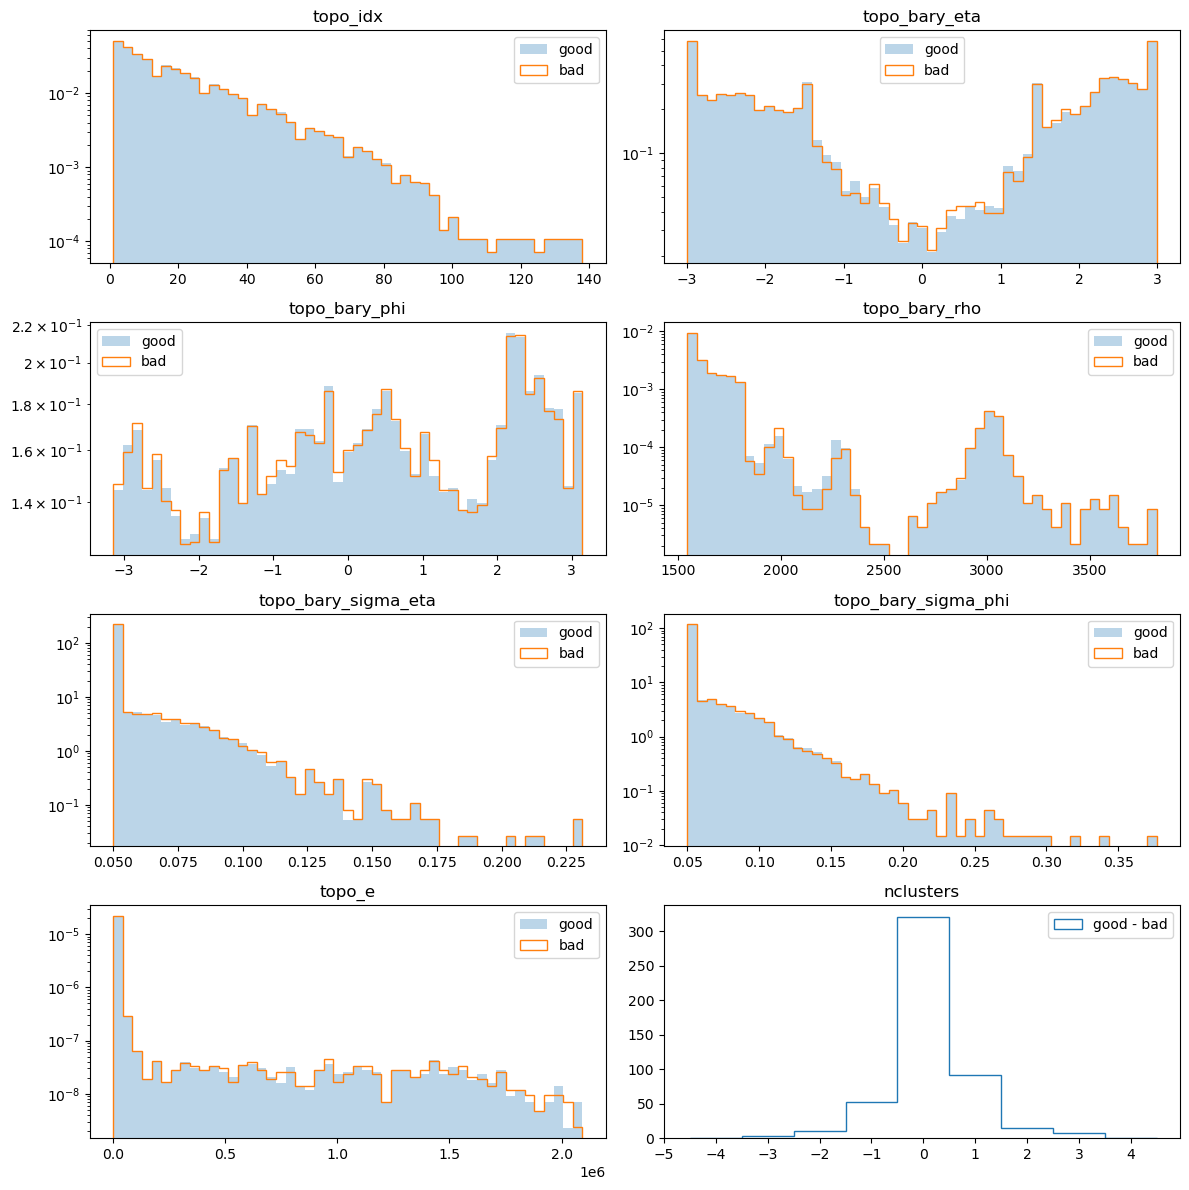

In [11]:
n_cols = 2
n_rows = len(topo_variables) // 2 + 1
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows), dpi=100)

for i, var in enumerate(topo_variables + ['nclusters']):
    row = i // n_cols
    col = i % n_cols
    if var == 'nclusters':
        good_ = good_data[var]
        bad_ = bad_data[var]
    else:
        good_ = np.concatenate(good_data[var])
        bad_ = np.concatenate(bad_data[var])
    bins = np.linspace(min(min(good_), min(bad_)), max(max(good_), max(bad_)), 50)
    if var == 'nclusters':
        ax[row, col].hist(good_ - bad_, bins=np.arange(-5, 5) + 0.5, histtype='step', label='good - bad')
        ax[row, col].set_xticks(np.arange(-5, 5))
    else:
        ax[row, col].hist(good_, bins=bins, histtype='stepfilled', label='good', density=True, alpha=0.3)
        ax[row, col].hist(bad_, bins=bins, histtype='step', label='bad', density=True)
    ax[row, col].set_title(var)
    ax[row, col].legend()
    if var != 'nclusters':
        ax[row, col].set_yscale('log')
plt.tight_layout()
plt.show()

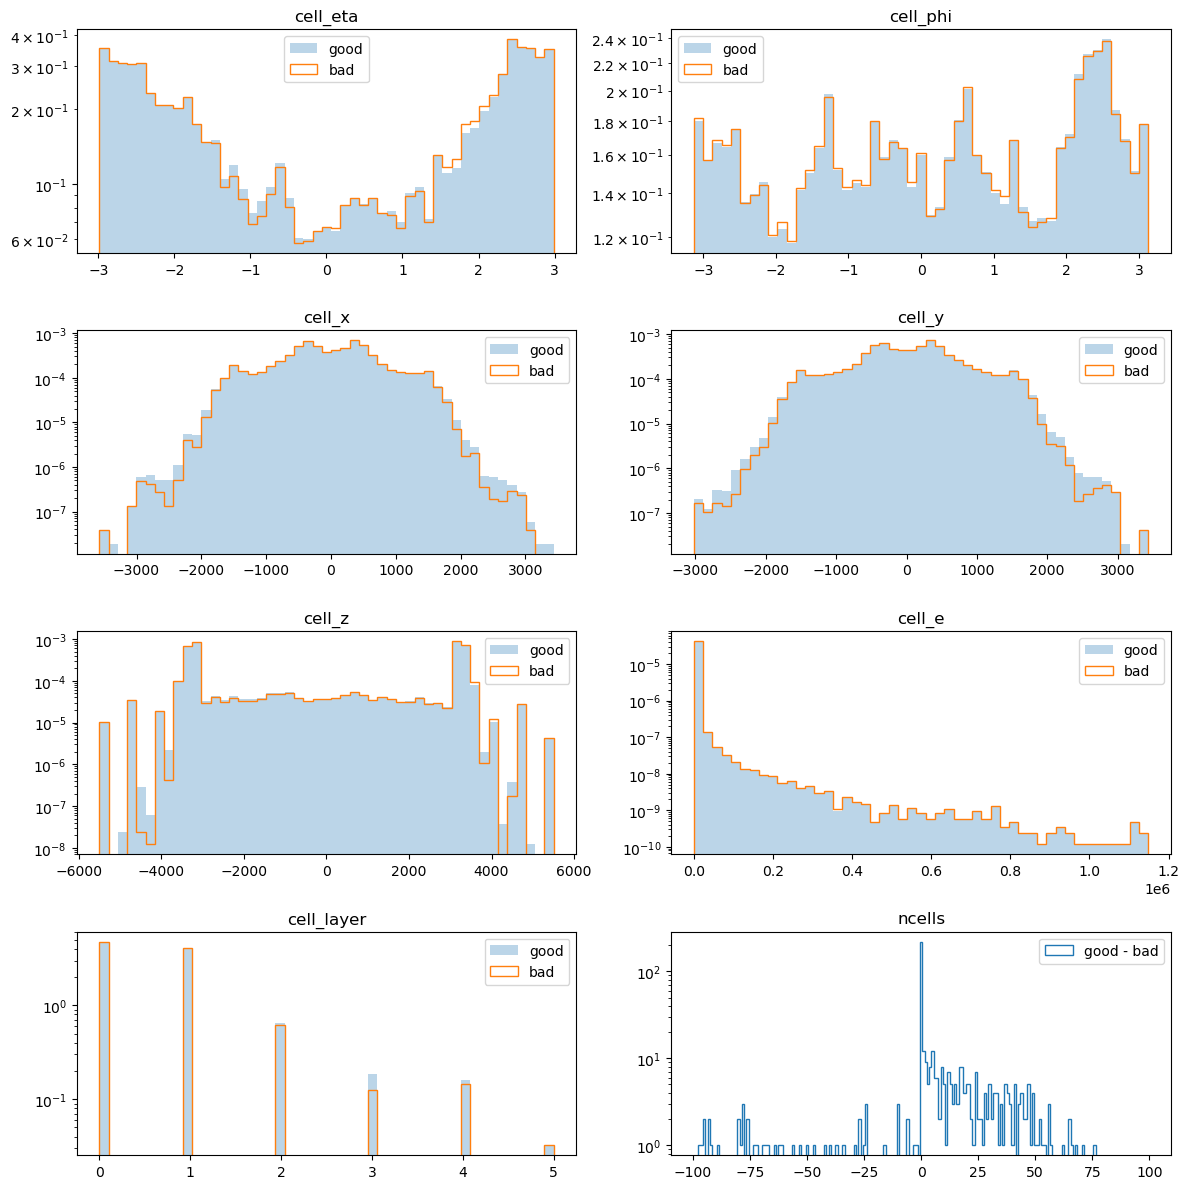

In [16]:
n_cols = 2
n_rows = len(cell_variables) // 2 + 1
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows), dpi=100)

for i, var in enumerate(cell_variables + ['ncells']):
    row = i // n_cols
    col = i % n_cols
    if var == 'ncells':
        good_ = good_data[var]
        bad_ = bad_data[var]
    else:
        good_ = np.concatenate(good_data[var])
        bad_ = np.concatenate(bad_data[var])
    bins = np.linspace(min(min(good_), min(bad_)), max(max(good_), max(bad_)), 50)
    if var == 'ncells':
        ax[row, col].hist(good_ - bad_, bins = np.arange(-100, 100) + 0.5, histtype='step', label='good - bad')
    else:
        ax[row, col].hist(good_, bins=bins, histtype='stepfilled', label='good', density=True, alpha=0.3)
        ax[row, col].hist(bad_, bins=bins, histtype='step', label='bad', density=True)
    ax[row, col].set_title(var)
    ax[row, col].legend()
    ax[row, col].set_yscale('log')
plt.tight_layout()
plt.show()

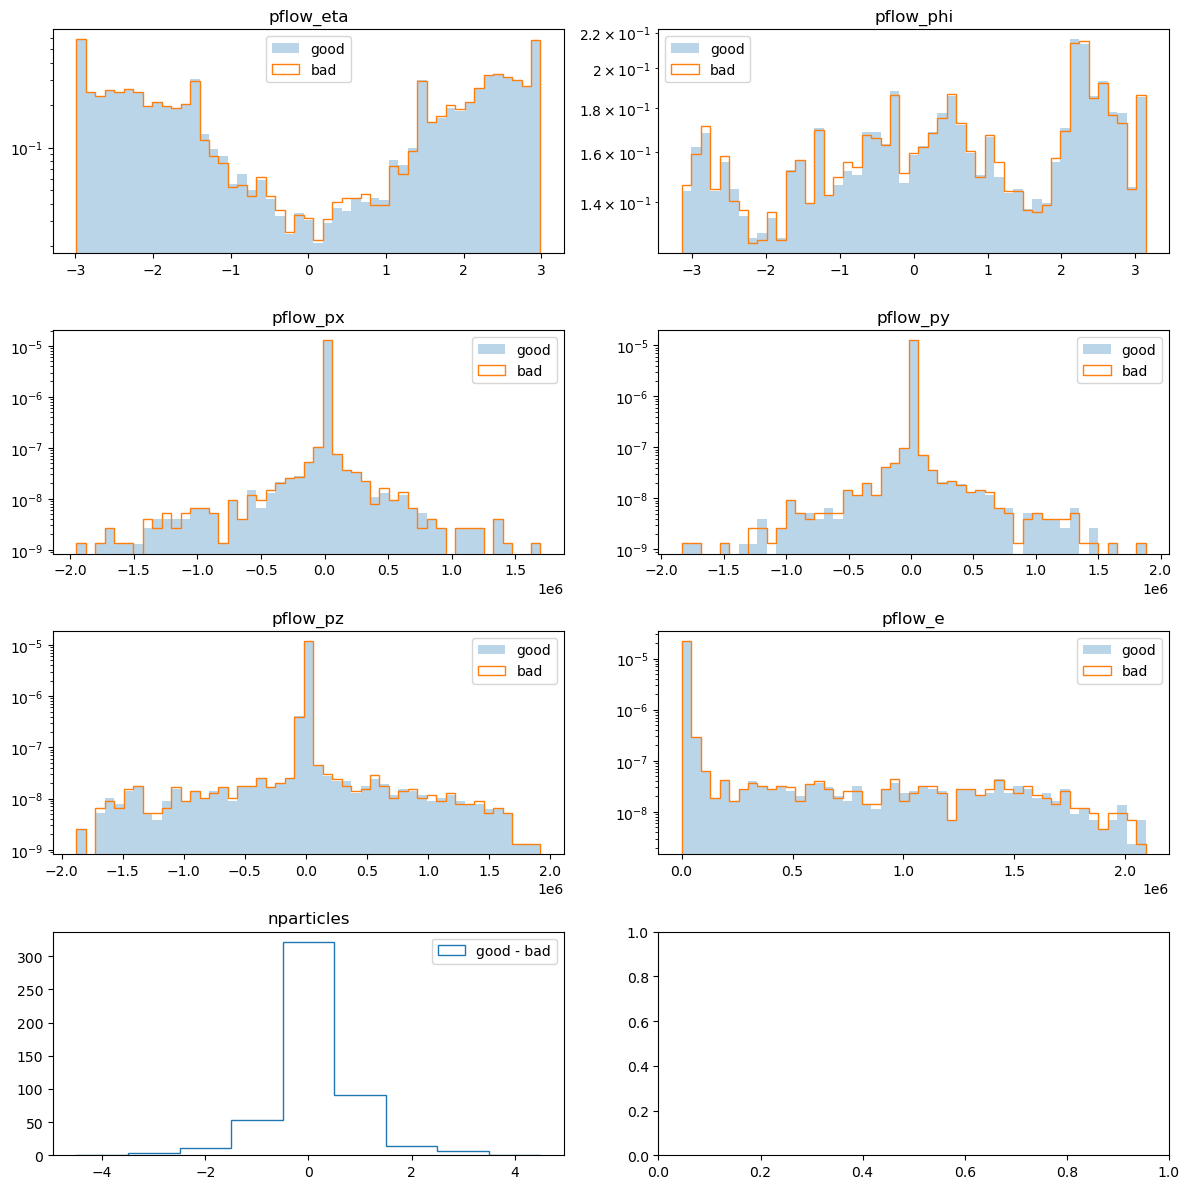

In [18]:
n_cols = 2
n_rows = len(pflow_variables) // 2 + 1
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows), dpi=100)

for i, var in enumerate(pflow_variables + ['nparticles']):
    row = i // n_cols
    col = i % n_cols
    if var == 'nparticles':
        good_ = good_data[var]
        bad_ = bad_data[var]
    else:
        good_ = np.concatenate(good_data[var])
        bad_ = np.concatenate(bad_data[var])
    bins = np.linspace(min(min(good_), min(bad_)), max(max(good_), max(bad_)), 50)
    if var == 'nparticles':
        ax[row, col].hist(good_ - bad_, bins = np.arange(-5, 5) + 0.5, histtype='step', label='good - bad', density=False)
    else:
        ax[row, col].hist(good_, bins=bins, histtype='stepfilled', label='good', density=True, alpha=0.3)
        ax[row, col].hist(bad_, bins=bins, histtype='step', label='bad', density=True)
    ax[row, col].set_title(var)
    ax[row, col].legend()
    if var != 'nparticles':
        ax[row, col].set_yscale('log')
plt.tight_layout()
plt.show()

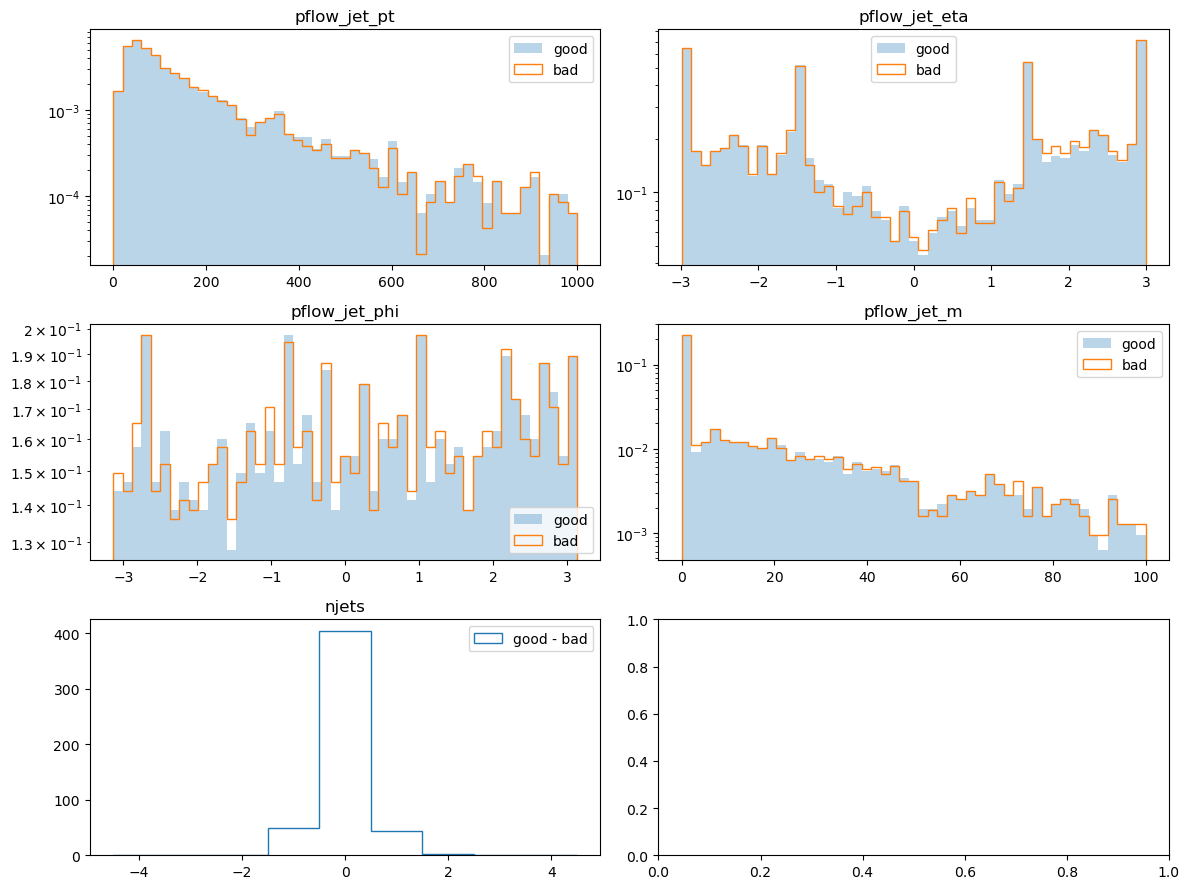

In [19]:
n_cols = 2
n_rows = len(pflow_jet_variables) // 2 + 1
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows), dpi=100)

for i, var in enumerate(pflow_jet_variables + ['njets']):
    row = i // n_cols
    col = i % n_cols
    if var == 'njets':
        good_ = good_data[var]
        bad_ = bad_data[var]
    else:
        good_ = np.concatenate(good_data[var])
        bad_ = np.concatenate(bad_data[var])
    bins = np.linspace(min(min(good_), min(bad_)), max(max(good_), max(bad_)), 50)
    if var == 'pflow_jet_m':
        bins = np.linspace(0, 100, 50)
    if var == 'pflow_jet_pt':
        bins = np.linspace(0, 1000, 50)
    if var == 'njets':
        ax[row, col].hist(good_ - bad_, bins = np.arange(-5, 5) + 0.5, histtype='step', label='good - bad', density=False)
    else:
        ax[row, col].hist(good_, bins=bins, histtype='stepfilled', label='good', density=True, alpha=0.3)
        ax[row, col].hist(bad_, bins=bins, histtype='step', label='bad', density=True)

    ax[row, col].set_title(var)
    ax[row, col].legend()
    if var != 'njets':
        ax[row, col].set_yscale('log')
plt.tight_layout()
plt.show()

In [108]:
import copy

In [146]:
def plot_event(idx):
    pixels_per_layer = [256,256,128,64,64,32]
    fig = plt.figure(figsize=(15, 5))
    gs = fig.add_gridspec(1, 3)
    cell_eta_good = good_data['cell_eta'][idx]
    cell_phi_good = good_data['cell_phi'][idx]
    cell_layer_good = good_data['cell_layer'][idx]

    cell_eta_bad = bad_data['cell_eta'][idx]
    cell_phi_bad = bad_data['cell_phi'][idx]
    cell_layer_bad = bad_data['cell_layer'][idx]
    cmap = copy.copy(plt.get_cmap("PuRd"))
    cmap.set_under("white")
    for layer in range(3):
        ax = fig.add_subplot(gs[layer//3, layer%3])
        ax.set_title(f'Layer {layer}')
        eta_bins = np.linspace(-3,3,pixels_per_layer[layer])
        phi_bins = np.linspace(-np.pi - 0.2,np.pi + 0.2,pixels_per_layer[layer])
        hist_good = np.histogram2d(cell_eta_good[cell_layer_good == layer], cell_phi_good[cell_layer_good == layer], bins=(eta_bins, phi_bins), weights=good_data['cell_e'][idx][cell_layer_good == layer])
        hist_bad = np.histogram2d(cell_eta_bad[cell_layer_bad == layer], cell_phi_bad[cell_layer_bad == layer], bins=(eta_bins, phi_bins), weights=bad_data['cell_e'][idx][cell_layer_bad == layer])

        # min_eta = min(np.min(cell_eta_good[cell_layer_good == layer]), np.min(cell_eta_bad[cell_layer_bad == layer]))
        # max_eta = max(np.max(cell_eta_good[cell_layer_good == layer]), np.max(cell_eta_bad[cell_layer_bad == layer]))

        # min_phi = min(np.min(cell_phi_good[cell_layer_good == layer]), np.min(cell_phi_bad[cell_layer_bad == layer]))
        # max_phi = max(np.max(cell_phi_good[cell_layer_good == layer]), np.max(cell_phi_bad[cell_layer_bad == layer]))


        if np.max(np.abs(hist_good[0] - hist_bad[0])) != 0:
            ax.imshow(np.abs(hist_good[0].T - hist_bad[0].T), extent=[eta_bins[0], eta_bins[-1], phi_bins[0], phi_bins[-1]], origin='lower', norm=LogNorm(clip=True), cmap=cmap)
        # ax.scatter(
        #     cell_eta_good[cell_layer_good == layer],
        #     cell_phi_good[cell_layer_good == layer],
        #     s=5,
        #     c='blue',
        #     alpha=1,
        #     label='good'
        # )
        # ax.scatter(
        #     cell_eta_bad[cell_layer_bad == layer],
        #     cell_phi_bad[cell_layer_bad == layer],
        #     s=5,
        #     c='red',
        #     alpha=1,
        #     label='bad'
        # )
        ax.scatter(
            good_data['particle_eta'][idx],
            good_data['particle_phi'][idx],
            s=40,
            c='green',
            marker='x',
        )
        # ax.set_xlim(-3, 3)
        # ax.set_ylim(-np.pi - 0.2, np.pi + 0.2)

        ax.set_xlim(good_data['particle_eta'][idx] - 0.4, good_data['particle_eta'][idx] + 0.4)
        ax.set_ylim(good_data['particle_phi'][idx] - 0.4, good_data['particle_phi'][idx] + 0.4)

        # ax.set_aspect('equal')
        ax.set_xlabel('Eta')
        ax.set_ylabel('Phi')
        ax.legend()

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_270199/1600567976.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


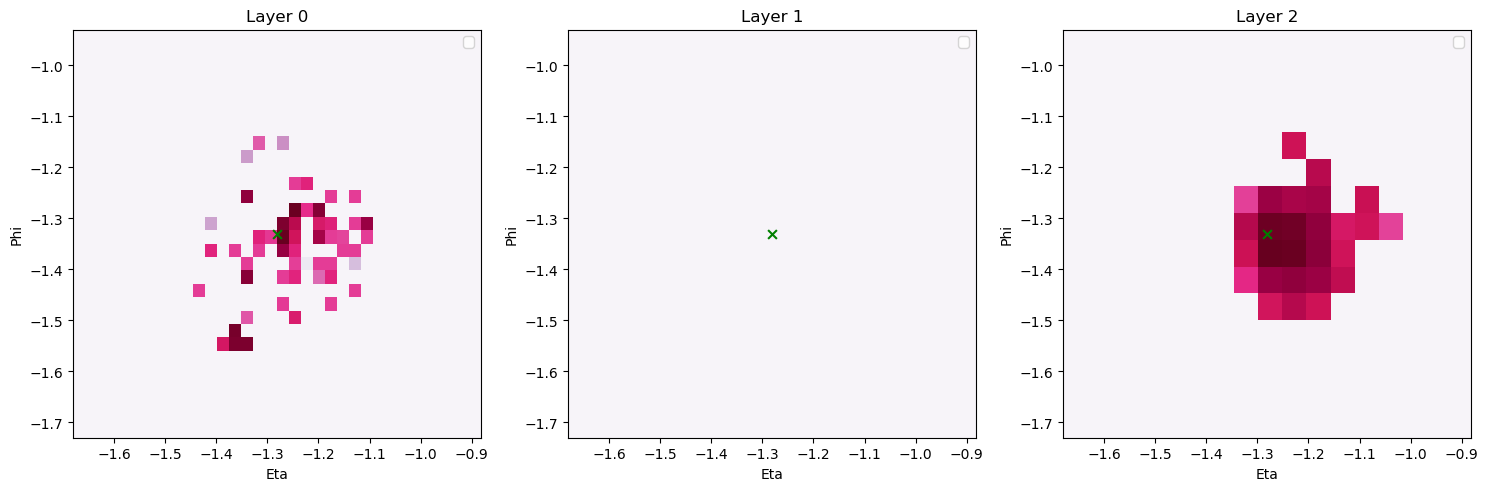

In [309]:
plot_event(255)

In [272]:
def get_hist_diff():
    pixels_per_layer = [256,256,128,64,64,32]
    diffs = [
        [],
        [],
        []
    ]
    for idx in range(len(good_data['cell_eta'])):
        cell_eta_good = good_data['cell_eta'][idx]
        cell_phi_good = good_data['cell_phi'][idx]
        cell_layer_good = good_data['cell_layer'][idx]

        cell_eta_bad = bad_data['cell_eta'][idx]
        cell_phi_bad = bad_data['cell_phi'][idx]
        cell_layer_bad = bad_data['cell_layer'][idx]

        for layer in range(3):
            eta_bins = np.linspace(-3,3,pixels_per_layer[layer])
            phi_bins = np.linspace(-np.pi - 0.2,np.pi + 0.2,pixels_per_layer[layer])
            hist_good = np.histogram2d(cell_eta_good[cell_layer_good == layer], cell_phi_good[cell_layer_good == layer], bins=(eta_bins, phi_bins), weights=good_data['cell_e'][idx][cell_layer_good == layer])
            hist_bad = np.histogram2d(cell_eta_bad[cell_layer_bad == layer], cell_phi_bad[cell_layer_bad == layer], bins=(eta_bins, phi_bins), weights=bad_data['cell_e'][idx][cell_layer_bad == layer])
            diffs[layer].append(np.abs(hist_good[0].T - hist_bad[0].T))
    return diffs

In [273]:
diffs = get_hist_diff()

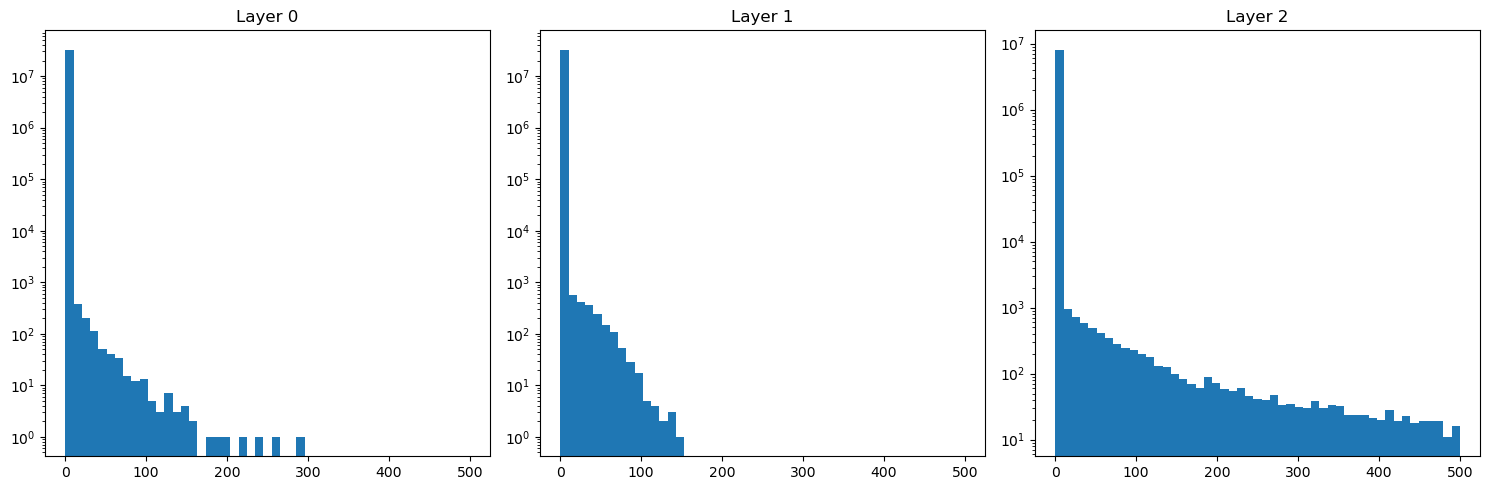

In [295]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    ax[i].hist(np.stack(diffs[i]).flatten(), bins=np.linspace(0, 500, 50))
    ax[i].set_title(f'Layer {i}')
    ax[i].set_yscale('log')
fig.tight_layout()
plt.show()

In [169]:
def plot_topo_event(idx):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    cmap = copy.copy(plt.get_cmap("PuRd"))
    cmap.set_under("white")
    
    topo_eta_good = good_data['topo_bary_eta'][idx]
    topo_phi_good = good_data['topo_bary_phi'][idx]
    topo_e_good = good_data['topo_e'][idx]

    topo_eta_bad = bad_data['topo_bary_eta'][idx]
    topo_phi_bad = bad_data['topo_bary_phi'][idx]
    topo_e_bad = bad_data['topo_e'][idx]

    ax.scatter(
        topo_eta_good,
        topo_phi_good,
        s=np.log1p(topo_e_good) * 5,
        c='blue',
        alpha=1,
        label='good'
    )

    ax.scatter(
        topo_eta_bad,
        topo_phi_bad,
        s=np.log1p(topo_e_bad) * 5,
        c='red',
        alpha=0.5,
        label='bad'
    )
    
    ax.scatter(
        good_data['particle_eta'][idx],
        good_data['particle_phi'][idx],
        s=40,
        c='green',
        marker='x',
    )
    # ax.set_xlim(-3, 3)
    # ax.set_ylim(-np.pi - 0.2, np.pi + 0.2)

    ax.set_xlim(good_data['particle_eta'][idx] - 0.4, good_data['particle_eta'][idx] + 0.4)
    ax.set_ylim(good_data['particle_phi'][idx] - 0.4, good_data['particle_phi'][idx] + 0.4)

    # ax.set_aspect('equal')
    ax.set_xlabel('Eta')
    ax.set_ylabel('Phi')
    ax.legend()

    plt.tight_layout()
    plt.show()

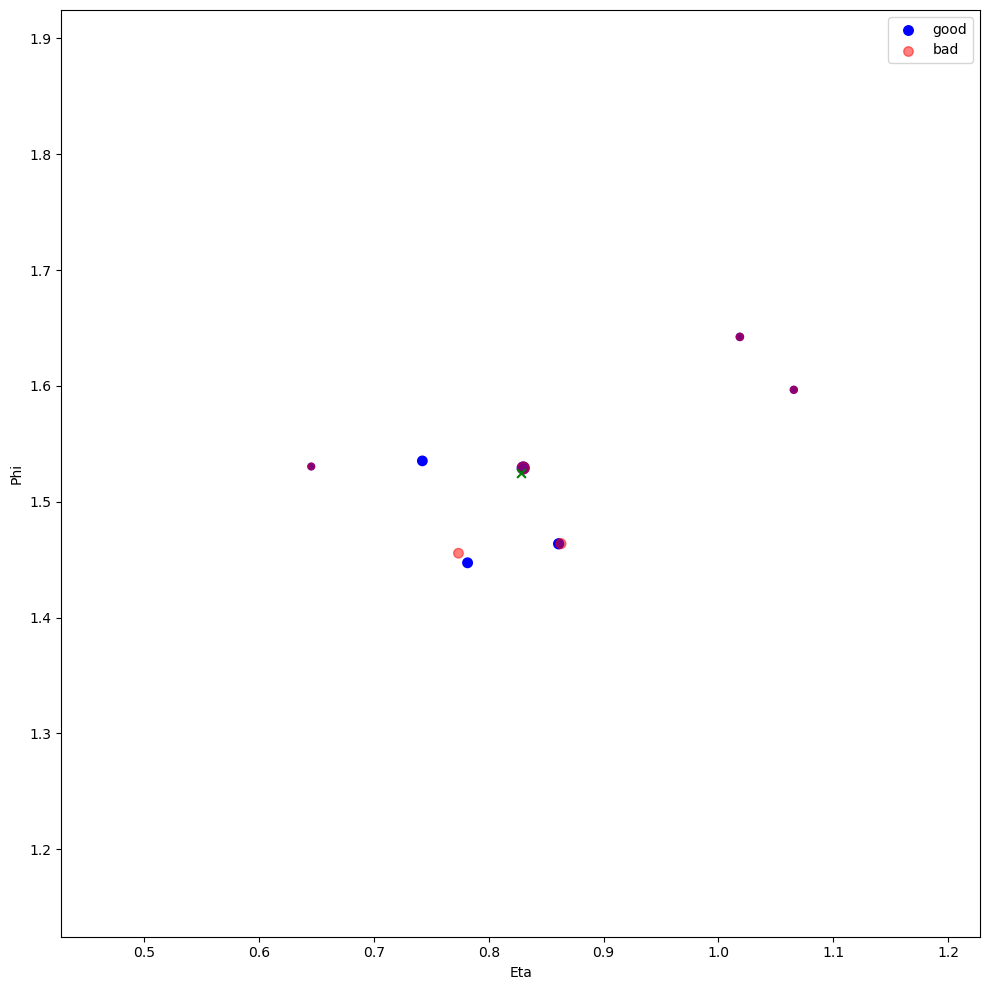

In [238]:
plot_topo_event(20)

In [187]:
from scipy.optimize import linear_sum_assignment
def matching(
    input_eta, input_phi, target_eta, target_phi, dr_cut=0.4
):
    def mse(a, b):
        return (a - b) ** 2

    input_indices = []
    target_indices = []
    hung_cost = np.zeros(len(input_eta))

    for i in tqdm.tqdm(range(len(input_eta)), desc="matching"):
        input_eta_i = input_eta[i]
        input_phi_i = input_phi[i]

        target_eta_i = target_eta[i]
        target_phi_i = target_phi[i]

        target_eta_i = np.tile(
            np.expand_dims(target_eta_i, axis=1), (1, len(input_eta_i))
        )  # row content same
        input_eta_i = np.tile(
            np.expand_dims(input_eta_i, axis=0), (len(target_eta_i), 1)
        )  # column content same

        target_phi_i = np.tile(
            np.expand_dims(target_phi_i, axis=1), (1, len(input_phi_i))
        )  # row content same
        input_phi_i = np.tile(
            np.expand_dims(input_phi_i, axis=0), (len(target_phi_i), 1)
        )  # column content same

        loss_phi = mse(target_phi_i, input_phi_i)
        loss_eta = mse(target_eta_i, input_eta_i)

        loss = loss_eta + loss_phi
        loss_hung = loss.copy()

        dr = np.sqrt(loss_eta + loss_phi)
        loss[dr > dr_cut] = 1e3

        loss[loss == np.inf] = 1000
        loss[loss == np.nan] = 1000
        target_ix, input_ix = linear_sum_assignment(loss)

        # Create boolean mask for dr < 0.6
        mask = dr <= dr_cut

        # Find all pairs (i, j) where dr < 0.6
        filtered_pairs = np.argwhere(mask)

        # Convert target_ix and input_ix into sets for fast lookups
        target_input_pairs = set(zip(target_ix, input_ix))

        # Select new pairs where (i, j) are in the filtered_pairs and target_input_pairs
        new_pairs = np.array(
            [pair for pair in filtered_pairs if tuple(pair) in target_input_pairs]
        )

        # Split new pairs into new_target_ix and new_input_ix
        if len(new_pairs) == 0:
            new_target_ix = []
            new_input_ix = []
        else:
            new_target_ix, new_input_ix = new_pairs.T

        input_ix = np.array(new_input_ix)
        target_ix = np.array(new_target_ix)

        if len(new_pairs) == 0:
            hung_cost[i] = 1000
            # print(i)
        else:
            indices = input_ix.shape[0] * target_ix + input_ix
            loss_extract = np.take_along_axis(loss_hung.flatten(), indices, axis=0)
            hung_cost[i] = loss_extract.mean()

        input_indices.append(input_ix)
        target_indices.append(target_ix)

    print("Matching done!")

    return target_indices, input_indices, hung_cost

In [210]:
good_topo_indices, bad_topo_indices, topo_hung_cost = matching(
    good_data['topo_bary_eta'], good_data['topo_bary_phi'], bad_data['topo_bary_eta'], bad_data['topo_bary_phi']
)

matching: 100%|██████████| 500/500 [00:00<00:00, 3144.61it/s]

Matching done!


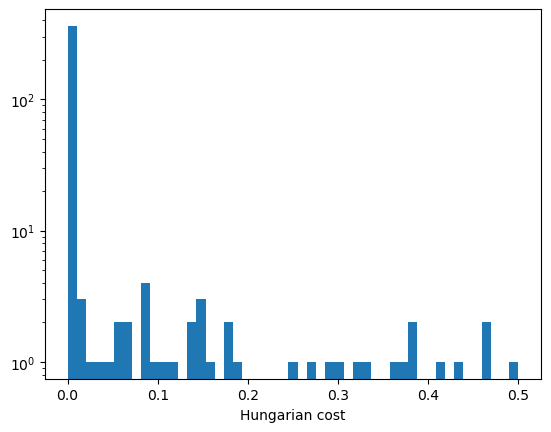

In [296]:
plt.hist(topo_hung_cost, bins=np.linspace(0, 0.5, 50))
plt.yscale('log')
plt.xlabel('Hungarian cost')
plt.show()

In [200]:
good_cell_indices = []
bad_cell_indices = []
cell_hung_cost = []
for layer in range(3):
    good_cell_layer = good_data['cell_layer']
    bad_cell_layer = bad_data['cell_layer']

    good_cell_eta = [good_data['cell_eta'][i][good_cell_layer[i] == layer] for i in range(len(good_cell_layer))]
    good_cell_phi = [good_data['cell_phi'][i][good_cell_layer[i] == layer] for i in range(len(good_cell_layer))]
    bad_cell_eta = [bad_data['cell_eta'][i][bad_cell_layer[i] == layer] for i in range(len(bad_cell_layer))]
    bad_cell_phi = [bad_data['cell_phi'][i][bad_cell_layer[i] == layer] for i in range(len(bad_cell_layer))]
    good_cell_indices_, bad_cell_indices_, hung_cost_ = matching(
        good_cell_eta, good_cell_phi, bad_cell_eta, bad_cell_phi
    )
    good_cell_indices.append(good_cell_indices_)
    bad_cell_indices.append(bad_cell_indices_)
    cell_hung_cost.append(hung_cost_)
    print(f'Layer {layer} done!')


matching:   0%|          | 0/500 [00:00<?, ?it/s]

matching: 100%|██████████| 500/500 [00:46<00:00, 10.66it/s]


Matching done!
Layer 0 done!


matching: 100%|██████████| 500/500 [00:39<00:00, 12.60it/s]


Matching done!
Layer 1 done!


matching: 100%|██████████| 500/500 [00:00<00:00, 566.50it/s]

Matching done!
Layer 2 done!


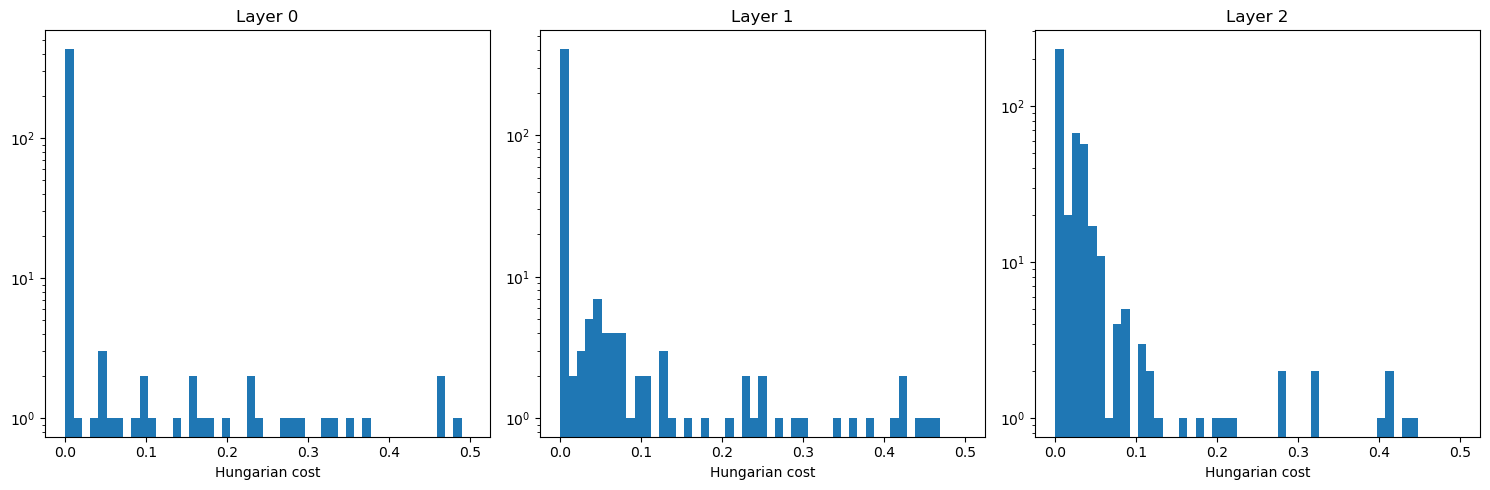

In [209]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, hung_cost in enumerate(cell_hung_cost):
    ax[i].hist(hung_cost, bins=np.linspace(0, 0.5, 50))
    ax[i].set_yscale('log')
    ax[i].set_title(f'Layer {i}')
    ax[i].set_xlabel('Hungarian cost')
fig.tight_layout()
plt.show()

In [217]:
def reshape_phi(phi):
    return np.atan2(np.sin(phi), np.cos(phi))

def calc_residuals(target_indices, indices, data, tr_data, varlist):
    res_pf = {}
    n_pf = 0
    for i in range(len(indices)):
        if len(indices[i]) == 0:
            continue
        n_pf += len(data[0][i][indices[i]])

    for var in varlist:
        res_pf[var] = np.zeros(n_pf)

    curr_pf_len = 0

    for i in tqdm.tqdm(range(len(indices)), desc="residuals"):
        if len(indices[i]) == 0:
            continue
        for j, var in enumerate(varlist):
            data_ = data[j][i][indices[i]]
            tr_data_ = tr_data[j][i]

            if len(data_) == 0 or len(tr_data_[target_indices[i]]) == 0:
                continue
            res_pf[var][curr_pf_len : curr_pf_len + len(data_)] = (
                tr_data_[target_indices[i]] - data_
            )
            if var == "pt" or var == "e":
                res_pf[var][curr_pf_len : curr_pf_len + len(data_)] /= tr_data_[
                    target_indices[i]
                ]

        curr_pf_len += len(data_)
    for var in varlist:
        res_pf[var] = res_pf[var][:curr_pf_len]
    res_pf["phi"] = reshape_phi(res_pf["phi"])

    return res_pf

In [218]:
cell_residuals = []

for layer in range(3):
    good_cell_layer = good_data['cell_layer']
    bad_cell_layer = bad_data['cell_layer']

    good_cell_e = [good_data['cell_e'][i][good_cell_layer[i] == layer] for i in range(len(good_cell_layer))]
    good_cell_eta = [good_data['cell_eta'][i][good_cell_layer[i] == layer] for i in range(len(good_cell_layer))]
    good_cell_phi = [good_data['cell_phi'][i][good_cell_layer[i] == layer] for i in range(len(good_cell_layer))]
    bad_cell_e = [bad_data['cell_e'][i][bad_cell_layer[i] == layer] for i in range(len(bad_cell_layer))]
    bad_cell_eta = [bad_data['cell_eta'][i][bad_cell_layer[i] == layer] for i in range(len(bad_cell_layer))]
    bad_cell_phi = [bad_data['cell_phi'][i][bad_cell_layer[i] == layer] for i in range(len(bad_cell_layer))]
    
    cell_residuals.append(calc_residuals(
        good_cell_indices[layer], bad_cell_indices[layer], [good_cell_e, good_cell_eta, good_cell_phi], [bad_cell_e, bad_cell_eta, bad_cell_phi], ['e', 'eta', 'phi']
    ))
    print(f'Layer {layer} done!')

residuals: 100%|██████████| 500/500 [00:00<00:00, 58809.65it/s]


Layer 0 done!


residuals:   0%|          | 0/500 [00:00<?, ?it/s]

residuals: 100%|██████████| 500/500 [00:00<00:00, 61089.81it/s]


Layer 1 done!


residuals: 100%|██████████| 500/500 [00:00<00:00, 119632.17it/s]

Layer 2 done!


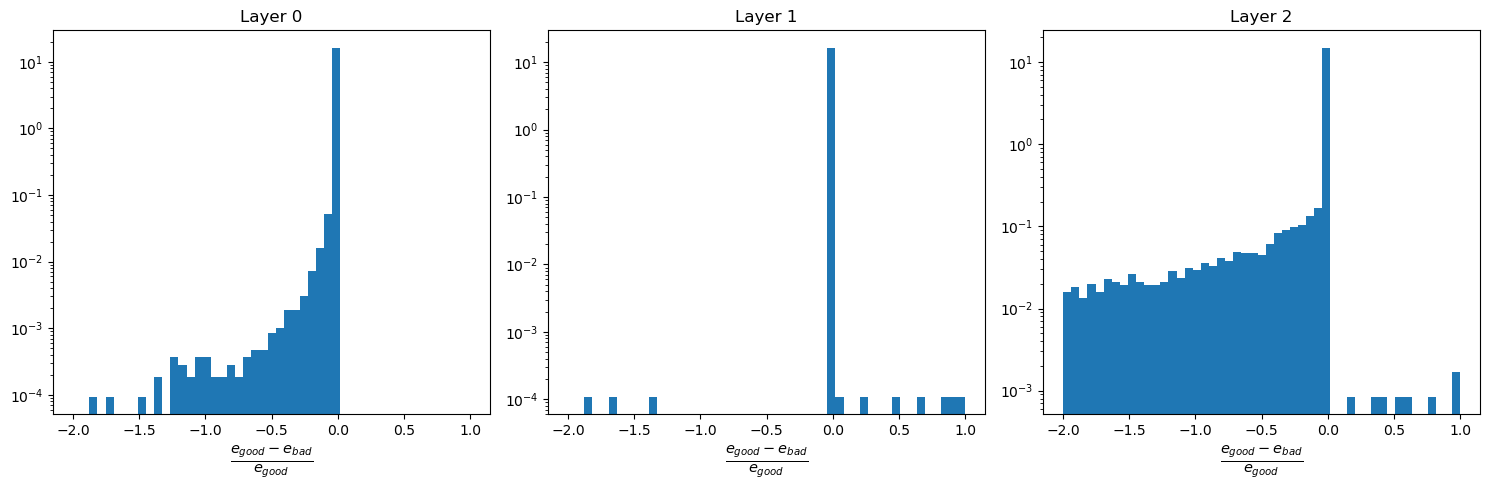

In [232]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, cell_res in enumerate(cell_residuals):
    for j, var in enumerate(['e']):
        ax[i].hist(cell_res[var], bins=np.linspace(-2, 1, 50), density=True)
        ax[i].set_title(f'Layer {i}')
        ax[i].set_yscale('log')
        ax[i].set_xlabel(r'$\frac{e_{good} - e_{bad}}{e_{good}}$', fontsize=15)
fig.tight_layout()
plt.show()

In [239]:
topo_res = calc_residuals(
    good_topo_indices, bad_topo_indices, [good_data['topo_e'], good_data['topo_bary_eta'], good_data['topo_bary_phi']], [bad_data['topo_e'], bad_data['topo_bary_eta'], bad_data['topo_bary_phi']], ['e', 'eta', 'phi']
)

residuals: 100%|██████████| 500/500 [00:00<00:00, 55527.22it/s]


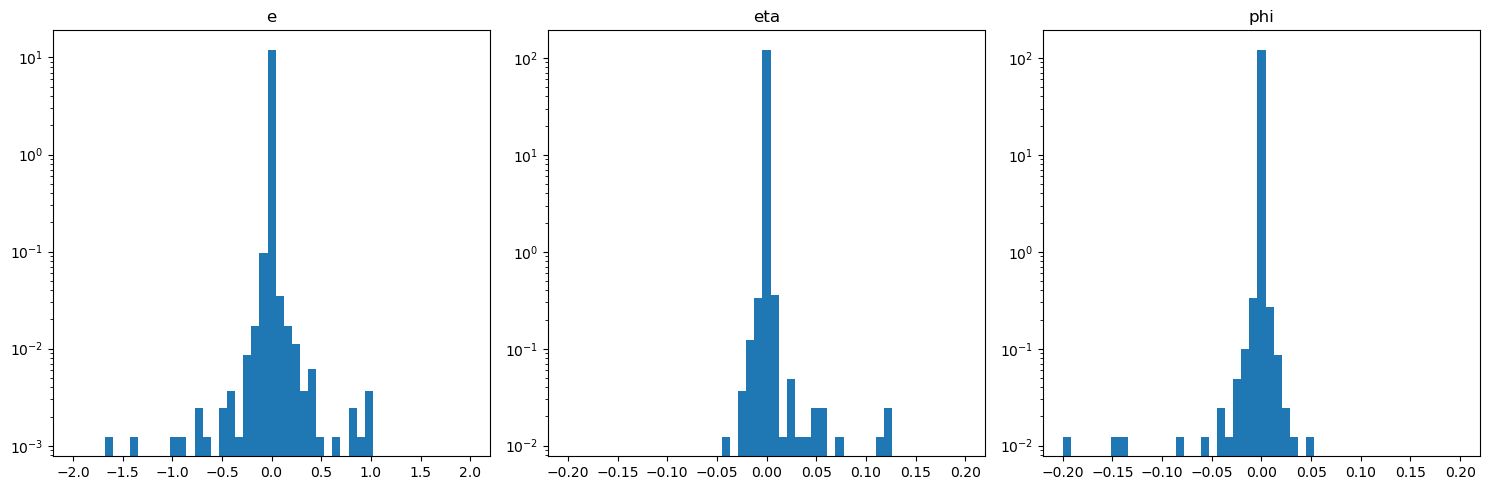

In [270]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
bins = {
    'e' : np.linspace(-2, 2, 50),
    'eta' : np.linspace(-0.2, 0.2, 50),
    'phi' : np.linspace(-0.2, 0.2, 50),
}
for i, var in enumerate(topo_res.keys()):
        ax[i].hist(topo_res[var], bins=bins[var], density=True)
        ax[i].set_title(f'{var}')
        ax[i].set_yscale('log')
fig.tight_layout()
plt.show()